In [1]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from models import *
from preprocessing import *

In [2]:
# Prepare data
df_train = pd.read_csv('TRAIN_FINAL.csv')
df_test = pd.read_csv('Test_v1.csv')

l = df_train.shape[0]

y_train = df_train['TARGET']
df_train.drop(['TARGET'], axis=1, inplace=True)

index = df_test['index']
df_test.drop(['index'], axis=1, inplace=True)

df = pd.concat([df_train, df_test])

In [3]:
# Preprocessing
drop_zero_var_columns(df)
binarize_columns(df)
drop_sparse_binary(df)
df = boxcox_transform(df)
df = normalize(df,scaler='standard')

df = df_to_float32(df)
replace_inf(df)
print ('Done.')

Dropping columns with zero variance.
Binarizing columns.
Dropping sparse binary columns.


Applying Boxcox transformation: 100%|██████████| 283/283 [00:21<00:00,  7.86column/s]


Normalizing df using standard scaler.


Reading as float32: 100%|██████████| 283/283 [00:08<00:00, 33.03column/s] 


Replacing inf in df.
Done.


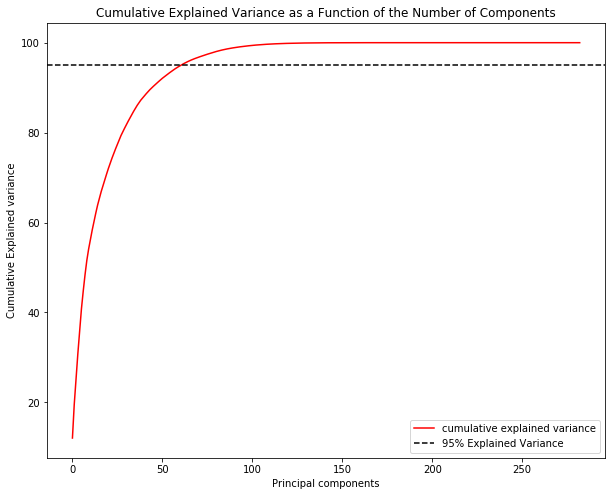

In [4]:
#Using elbow-plot variance/dimensions
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10,8))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

In [5]:
# Reduce dimension of features
pca = PCA(0.95)

df.dropna(inplace=True)
df_1 = pca.fit_transform(df)

In [6]:
X_train = df_1[:l]
X_test = df_1[l:]

In [7]:
X_train.shape, X_test.shape

((45612, 62), (10199, 62))

In [6]:
print ('DecisionTreeClassifier ->')
dt = DecisionTreeClassifier()
k_fold(dt, X_train, y_train)
print

print('GradientBoostingClassifier ->')
gb = GradientBoostingClassifier()
k_fold(gb, X_train, y_train)
print

print('XGBClassifier ->')
xgb = XGBClassifier()
k_fold(xgb, X_train, y_train)
print

DecisionTreeClassifier ->
Performing 5-fold cv...
Mean AUROC = 0.5172731089595313
GradientBoostingClassifier ->
Performing 5-fold cv...
Mean AUROC = 0.503242840051321
XGBClassifier ->
Performing 5-fold cv...


KeyboardInterrupt: 